Github Repo: 
https://github.com/adam080880/tb2-image-processing/blob/main/tb2.ipynb

Soal no 5
Kerjakan pengolahan citra gambar dibawah ini menggunakan Operator Sobel, dengan sobel_x array ([-1,1,1],[-2,1,2],[-1,1,1]) dan sobel_y array ([-1,2,1],[0,1,0],[1,2,1])

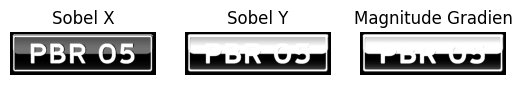

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar dan ubah ke grayscale
img = cv2.imread('no3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Definisikan kernel Sobel
sobel_x = np.array([
    [-1, 1, 1],
    [-2, 1, 2],
    [-1, 1, 1]
], dtype=np.float32)

sobel_y = np.array([
    [-1, 2, 1],
    [ 0, 1, 0],
    [ 1, 2, 1]
], dtype=np.float32)

# Konvolusi (filtering) dengan kernel
grad_x = cv2.filter2D(gray, -1, sobel_x)
grad_y = cv2.filter2D(gray, -1, sobel_y)

# Hitung magnitude gradien (gabungan sobel x dan y)
magnitude = cv2.magnitude(grad_x.astype(np.float32), grad_y.astype(np.float32))
magnitude = cv2.convertScaleAbs(magnitude)  # ubah ke uint8 agar bisa ditampilkan

# Tampilkan hasil
plt.subplot(1, 3, 1)
plt.title('Sobel X')
plt.imshow(grad_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('Sobel Y')
plt.imshow(grad_y, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Magnitude Gradien')
plt.imshow(magnitude, cmap='gray')
plt.axis('off')
plt.show()


Soal no 6
Kerjakan pengolahan citra menggunakan konvolusi fungsi 2D dan tampilkan histogram citranya pada citra bunga matahari

Image with padding: (198, 263)
Kernel 3x3 :  (3, 3) (3, 3) (3, 3)


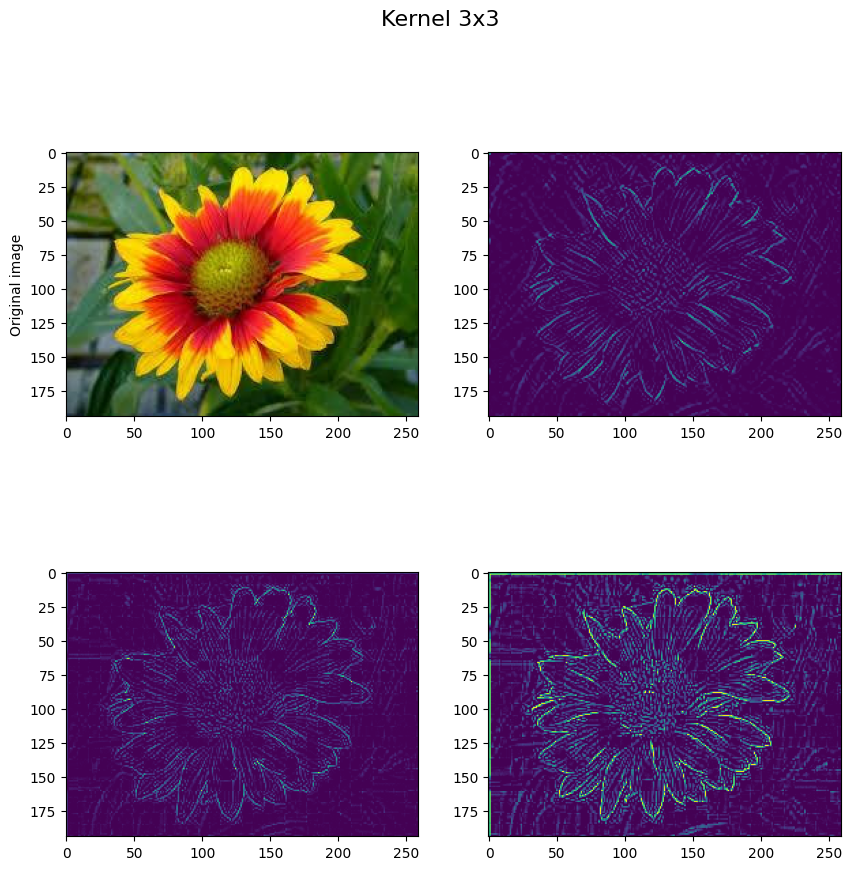

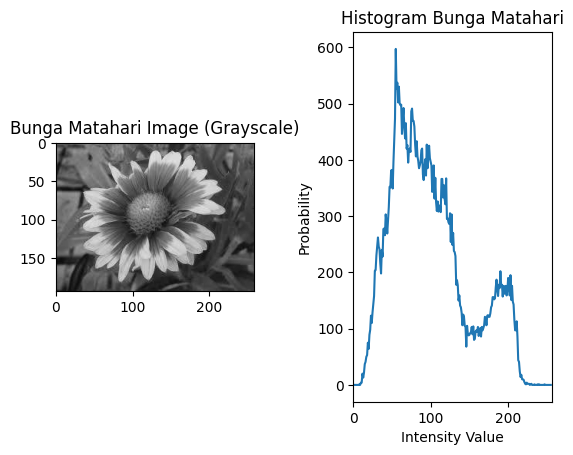

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    # Baca sebagai grayscale
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def original(path):
    # Baca sebagai RGB agar warnanya benar untuk ditampilkan
    img_bgr = cv2.imread(path)
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#installing the library or creating file activation.py
#with the following function and other functions needed in your code.
#The content of the file activation.py would be:
#import numpy as np
def relu(x):
    return np.maximum(0, x)

# Remove the import statement and Activation class instantiation
#from activation_function import Activation
#ac = Activation()

data = './BungaMatahari.jpg'
image_pad = np.pad(load_image(data), (2,2), mode='constant', constant_values=0)
print('Image with padding:',image_pad.shape)


"""
Kernels (filters)
with size 3x3 for edge detection
"""

kernel_1 = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])
kernel_2 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
kernel_3 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

print("Kernel 3x3 : ",kernel_1.shape,kernel_2.shape,kernel_3.shape)

# Preparing zero output arrays for filtered images


output_image1 = np.zeros(load_image(data).shape)
output_image2 = np.zeros(load_image(data).shape)
output_image3 = np.zeros(load_image(data).shape)


def pixels(arr):
    """

    Values that are more than 255

    """
    # Creating an empty array
    empty = np.empty(arr.shape)
    # Filling array with 255 value for all elements
    empty.fill(255)
    # has to be less than appropriate element in 'empty'
    result = np.where(arr < empty, arr, empty)
    return result

# Implementing convolution operation for Edge detection for GrayScale image

for i in range(image_pad.shape[0]-4):
    for j in range(image_pad.shape[1]-4):
        input_image = image_pad[i:i+3, j:j+3]
        output_image1[i,j] = np.sum(input_image*kernel_1)
        output_image2[i,j] = np.sum(input_image*kernel_2)
        output_image3[i, j] = np.sum(input_image * kernel_3)


#Instead of ac.relu use relu directly since it is already defined
output_image1 = pixels(relu(output_image1))
output_image2 = pixels(relu(output_image2))
output_image3 = pixels(relu(output_image3))

def show_histogram(hist, title='Histogram gambar kameramen'):
    plt.subplot(1, 2, 2)
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.xlabel('Intensity Value')
    plt.ylabel('Probability')
    plt.title(title)
    plt.subplots_adjust(wspace=0.5)
    plt.show()


def Conv():
    f, axarr = plt.subplots(2, 2, figsize=(10, 10))
    #plt.set_cmap('gray')
    f.suptitle('Kernel 3x3', fontsize=16)
    axarr[0, 0].imshow(original(data))
    axarr[0,0].set_ylabel('Original image')
    #
    axarr[0, 1].imshow(output_image1)

    #
    axarr[1, 0].imshow(output_image2)

    #
    axarr[1, 1].imshow(output_image3)

    plt.show()
Conv()

# Histogram-nya
# convert to grayscale dulu foto bunga mataharinya
img_bunga = cv2.imread(data, cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.subplot(1, 2, 1)
plt.title('Bunga Matahari Image (Grayscale)')
plt.imshow(img_bunga, cmap='gray')
show_histogram(cv2.calcHist([img_bunga], [0], None, [256], [0, 256]), 'Histogram Bunga Matahari')
plt.show()



Soal no 7
Kerjakan pengolahan citra menggunakan GrayScale, Image Smoothing Using Gaussain filter, Image sharpening using Laplacian filter dan Edge detection using Prewitt filter in y direction pada citra bola di lapangan


<Figure size 640x480 with 0 Axes>

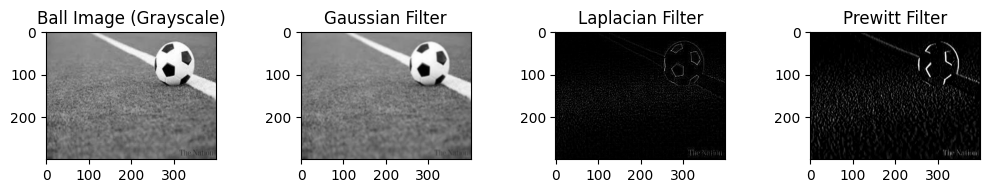

In [11]:
ball = cv2.imread('./4.jpg', cv2.IMREAD_GRAYSCALE)

# Grayscale
plt.figure()
f, axarr = plt.subplots(1, 4, figsize=(10, 10))
axarr[0].set_title('Ball Image (Grayscale)')
axarr[0].imshow(ball, cmap='gray')

# Image Smoothing using Gaussian Filter
def gaussian_filter(image, kernel_size=5, sigma=1.0):
    # Create a Gaussian kernel
    kernel = cv2.getGaussianKernel(kernel_size, sigma)
    kernel = np.outer(kernel, kernel.transpose())
    # Apply the Gaussian filter to the image
    smoothed_image = cv2.filter2D(image, -1, kernel)
    return smoothed_image
# Apply Gaussian filter
smoothed_ball = gaussian_filter(ball, kernel_size=5, sigma=1.0)

axarr[1].set_title('Gaussian Filter')
axarr[1].imshow(smoothed_ball, cmap='gray')

# Image Sharpening using Laplacian Filter
def laplacian_filter(image):
    # Create a Laplacian kernel
    kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    # Apply the Laplacian filter to the image
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image
# Apply Laplacian filter
sharpened_ball = laplacian_filter(ball)
axarr[2].set_title('Laplacian Filter')
axarr[2].imshow(sharpened_ball, cmap='gray')

# Edge Detection using Prewitt Filter in y direction
def prewitt_filter(image):
    # Create a Prewitt kernel
    kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    # Apply the Prewitt filter to the image
    edge_image = cv2.filter2D(image, -1, kernel)
    return edge_image
# Apply Prewitt filter
prewitt_ball = prewitt_filter(ball)
axarr[3].set_title('Prewitt Filter')
axarr[3].imshow(prewitt_ball, cmap='gray')
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)

plt.show()
